# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


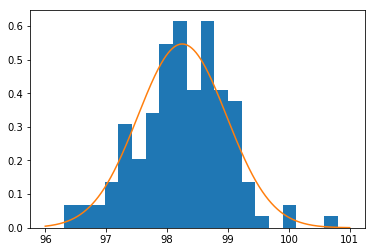

In [33]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(96, 101, 0.001)

plt.hist(df.temperature, bins=20, normed=True)
plt.plot(x, norm.pdf(x, np.mean(df.temperature), np.std(df.temperature)))
plt.show()

#### Conclusion: 1. It is close to a normal distribution

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


#### Conclusion: 2. the sample size is not large (130), however the observation can be considered as independent

In [36]:
def bs_func(data, func, size=1):
    bs_sample = np.empty(size)
    
    for i in range(size):
        temp = np.random.choice(data, len(data))
        bs_sample[i] = func(temp)
    return bs_sample

bs_temperature = bs_func(df.temperature, np.mean, 1000)

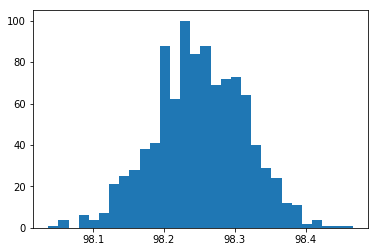

In [37]:
plt.hist(bs_temperature, bins=30)
plt.show()

In [38]:
p_value = np.sum(bs_temperature>=98.6) / len(bs_temperature)
print('p value is:' + str(p_value))

p value is:0.0


#### Conclusion: 3.using bootstrap hypothesis test
The Null hypothesis is that the normal body temperature is 98.6 F. 

By using bootstrap, we randomly sample 130 temperature points from the dataset for 1000 times, and compute the mean of those samples.

Then we calculate percentage of the data that are greater or equal to 98.6, p-value is 0. It suggests that Null hypothesis should be rejected.

In [42]:
t = (98.6 - np.mean(df.temperature)) / (np.std(df.temperature)/(130)**0.5)
print('t is:' + str(t))

t is:5.475925202078116


#### Conclusion: 3.using frequentist statistical test
The Null hypothesis is that the normal body temperature is 98.6 F. 

We then calculate t statistics using the code above w,ich yields t = 5.5

for a freedom of 130 and t statistics = 5.5, two tail p-value is smaller than 0.001, which is way smaller than alpha which is usually 0.05.

Therefore, the Null hypothesis should be rejected.

In [49]:
bs_low, bs_high = np.empty(1000), np.empty(1000)

for i in range(1000):
    temp = np.random.choice(df.temperature, len(df.temperature))
    bs_low[i] = np.percentile(temp, 2.5)
    bs_high[i] = np.percentile(temp, 97.5)

In [50]:
print('2 standard deviation of the bootstrap data is:')
print([np.mean(bs_low), np.mean(bs_high)])

print('2 standard deviation of the temperature data is:')
print(np.percentile(df.temperature, [2.5,97.5]))

2 standard deviation of the bootstrap data is:
[96.7767125, 99.57532499999999]
2 standard deviation of the temperature data is:
[96.7225 99.4775]


#### Conclusion: 5. computer abnormal body temperature
Here we consider 'abnormal' body temperature is 2 standard diviation from the statistics mean.

The first method is to use bootstrap, and created 1000 samples of size 130, then compute individuals 2.5 and 97.5 percentile. The second method is to compute 2.5 and 97.5 percentile from the data.

In [53]:
male_temp = df.temperature[df.gender=='M']
female_temp = df.temperature[df.gender=='F']

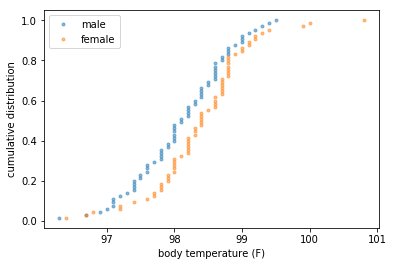

In [61]:
def ecdf(data):
    data = sorted(data)
    cdf = np.linspace(1,len(data),len(data)) / len(data)
    return data, cdf

male_x, male_y = ecdf(male_temp)
female_x, female_y = ecdf(female_temp)

plt.plot(male_x, male_y, linestyle='none', marker='.', alpha=0.5)
plt.plot(female_x, female_y, linestyle='none', marker='.', alpha=0.5)

plt.xlabel('body temperature (F)')
plt.ylabel('cumulative distribution')
plt.legend(['male', 'female'])
plt.show()

#### 6. Is there a significant difference in body temperature between male and female?
By looking at the cumulative distribution of body temperature for male and female, there is a difference. 

However, we need to develop a statistical test to confirm our observation

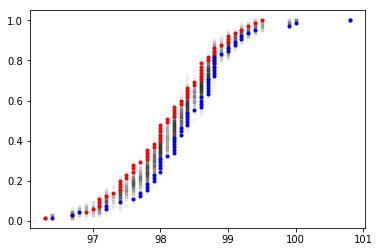

In [64]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    perm_data = np.random.permutation(data)
    perm_data1 = perm_data[1:len(data1)]
    perm_data2 = perm_data[len(data1):] 
    return perm_data1, perm_data2

for i in range(50):
    perm_data1, perm_data2 = permutation_sample(male_temp, female_temp)
    x1, y1 = ecdf(perm_data1)
    x2, y2 = ecdf(perm_data
    _ = plt.plot(x1, y1, marker='.', linestyle='none',
                 color='purple', alpha=0.02)
    _ = plt.plot(x2, y2, marker='.', linestyle='none',
                 color='green', alpha=0.02)

x1, y1 = ecdf(male_temp)
x2, y2 = ecdf(female_temp)
_ = plt.plot(x1, y1, marker='.', linestyle='none', color='red')
_ = plt.plot(x2, y2, marker='.', linestyle='none', color='blue')

plt.show()

In [70]:
perm_replicates = np.empty(10000)

for i in range(10000):
    perm_data1, perm_data2 = permutation_sample(male_temp, female_temp)
    perm_replicates[i] = np.mean(perm_data1) - np.mean(perm_data2)

diff_mean = np.mean(male_temp) - np.mean(female_temp)

p = np.sum(perm_replicates<=diff_mean) / len(perm_replicates)
print('p-value is: ' + str(p))

p-value is: 0.0137


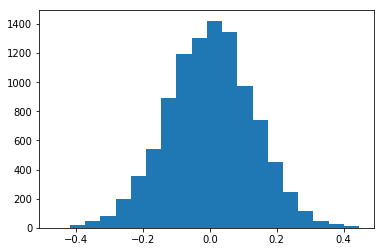

In [71]:
plt.hist(perm_replicates, bins=20)
plt.show()

#### 6. Is there a significant difference in body temperature between male and female?
The null hypothesis is there is no difference between male and female mean body temperature


P-value to test this hypothesis is 0.0137, there we should reject the null hypothesis and conclude that there is difference between male and female mean body temperature